In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

In [68]:
data = pd.read_csv('/Users/arthurrastelli/Desktop/DS/Assignment/Assignment.csv')
KULbg =  "#116E8A"

In [76]:
# ADD A COLUMN FOR THE AVERAGE CLAIM FREQUENCY
data["sev"] = data['chargtot']/data['nclaims']
data = data.rename(columns= {'duree': 'expo','nbrtotan': 'freq','nbrtotc': 'nclaims'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   expo      163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nclaims   163657 non-null  int64  
 5   freq      163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
 16  sev       18345 non-null   float64
dtypes: float64(5), int64(3), object(9)
memory usage: 21.2+ MB


SUMMARY STATISTICS

In [77]:
# EMPIRICAL CLAIM FREQUENCY 
emp_freq=data.groupby("nclaims").agg(tot_obs = ('nclaims', 'count'), tot_expo = ('expo', 'sum')).reset_index()
emp_freq

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
           ^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
            ^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.p

   nclaims  tot_obs       tot_expo
0        0   145312  128595.947945
1        1    16602   15410.320548
2        2     1562    1447.301370
3        3      162     150.454795
4        4       17      14.328767
5        5        2       1.375342

In [78]:
# MEAN SEVERITY
# severity is the average amount per claim = amount / nclaims
# We now calculate the average severity 
data['sev'].mean(skipna=True)

1627.9955071032293

GRAPHS

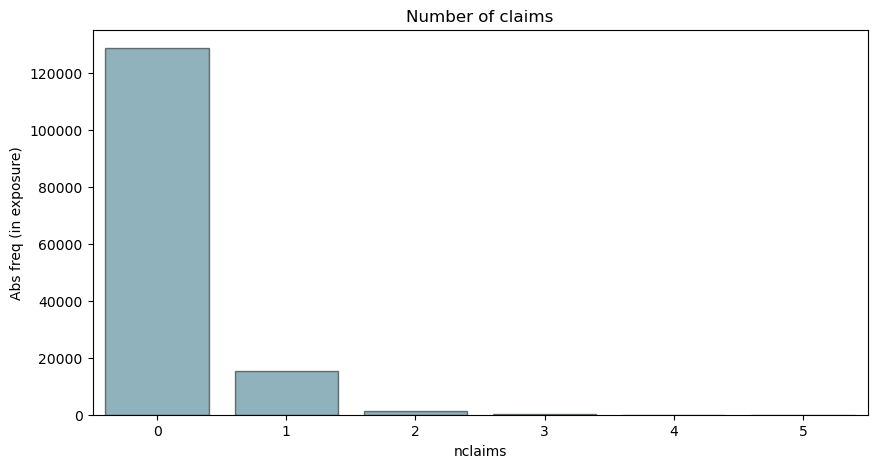

In [79]:
plt.figure(figsize = (10, 5))
sns.barplot(data = emp_freq, x = "nclaims", y = "tot_expo", color = KULbg, alpha = 0.5, edgecolor = 'black', linewidth = 1)
plt.ylabel("Abs freq (in exposure)")
plt.xlabel("nclaims")
plt.title('Number of claims')
plt.show()

In [80]:
pos_sev = data[data['sev']>0]
pos_sev.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/IPython/core/formatters.py", line 344, in __call__
    return method()
           ^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/core/frame.py", line 1106, in _repr_html_
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/format.py", line 1110, in to_html
    When formatting an Index subclass
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.py", line 88, in to_string
    lines = self.render()
            ^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.py", line 644, in render
    super().render()
  File "/opt/anaconda3/lib/python3.11/site-packages/pandas/io/formats/html.p

    AGEPH  CODPOSS      expo    lnexpo  nclaims       freq     chargtot  \
1      28     1000  0.046575 -3.066684        1  21.470588   155.974606   
12     72     1050  1.000000  0.000000        1   1.000000  1426.379342   
15     28     1060  0.956164 -0.044825        2   2.091691  1576.354924   
20     52     1070  0.452055 -0.793952        3   6.636364  8885.396345   
22     56     1082  1.000000  0.000000        1   1.000000   619.733812   

   agecar    sexp   fuelc    split     usec fleetc sportc   coverp  powerc  \
1    6-10  Female  Petrol    Twice  Private     No     No     MTPL  66-110   
12    2-5  Female  Petrol     Once  Private     No     No  MTPL+++  66-110   
15   6-10  Female  Petrol    Twice  Private     No     No     MTPL  66-110   
20   6-10  Female  Petrol  Monthly  Private     No    Yes     MTPL    >110   
22    0-1  Female  Petrol     Once  Private     No     No    MTPL+  66-110   

            sev  
1    155.974606  
12  1426.379342  
15   788.177462  
20  2961

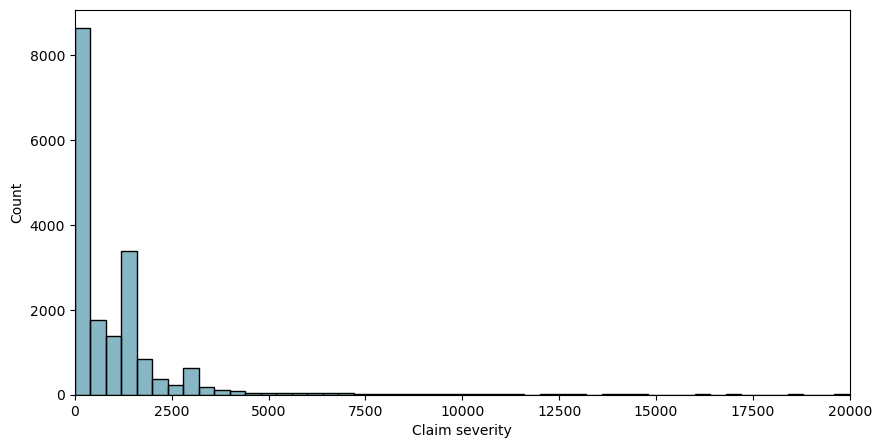

In [82]:
plt.figure(figsize = (10,5))
sns.histplot(data = pos_sev, x = "sev", stat = 'count', color = KULbg, alpha = 0.5, bins = 50, binrange = [0, 20000], edgecolor = 'black', linewidth = 1)
plt.xlabel("Claim severity")
plt.xlim(0, 20000)
plt.show()"r" 

GENERALIZED LINEAR MODEL IN PYTHON